# Logistische Regression mit Scikit-Learn

## Lernziele

```{admonition} Lernziele
:class: important
* Sie können ein logistisches Regressionsmodell mit Scikit-Learn trainieren.
```

## LogisticRegression

Scikit-Learn bietet ein logistisches Regressionsmodell an, bei dem verschiedene
Gradientenverfahren im Hintergrund die Gewichte bestimmen, die zu einer
minimalen mittleren Kostenfunktion führen. Die Dokumentation zu dem logistischen
Regressionsmodell findet sich hier: [scikit-learn.org →
LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). 

Wir wenden nun das Scikit-Learn-Modell auf unser Beispiel der binären
Klassifikation "Ligazugehörigkeit abhängig vom Marktwert" deutscher
Fußballvereine an. Dazu wiederholen laden wir die Daten und filtern zunächst
nach Vereinen der 2. Bundesliga oder der 3. Liga.

In [1]:
# import all data
import pandas as pd
data_raw = pd.read_csv('data/20220801_Marktwert_Bundesliga.csv', skiprows=5, header=0, index_col=0)

# filter wrt 2. Bundesliga and 3. Liga
filter = data_raw['Ligazugehörigkeit'].isin(['2. Bundesliga', '3. Liga']) 
data = data_raw[filter].copy(())

# print all data samples
data.head(38)

,Ligazugehörigkeit,Wert,Kadergröße
Verein,,,
Hamburger SV,2. Bundesliga,34.85,28
Arminia Bielefeld,2. Bundesliga,31.10,26
SpVgg Greuther Fürth,2. Bundesliga,24.55,27
FC St. Pauli,2. Bundesliga,23.50,28
Fortuna Düsseldorf,2. Bundesliga,19.55,23
Hannover 96,2. Bundesliga,22.60,28
1.FC Nürnberg,2. Bundesliga,23.25,27
SV Darmstadt 98,2. Bundesliga,18.93,26
Karlsruher SC,2. Bundesliga,16.95,30


Als nächstes formulieren wir das Klassifikationsproblem: Gegeben ist ein Verein mit seinem Marktwert. Spielt der Verein in der 2. Bundesliga?

Die Klasse `2. Bundesliga` wird in den Daten als `1` codiert, da der ML-Algorithmus nur mit numerischen Daten arbeiten kann. Den String `3. Liga` ersetzen wir in den Trainingsdaten durch eine `0`.

In [2]:
# encode categorical data
data.replace('2. Bundesliga', 1, inplace=True)
data.replace('3. Liga', 0, inplace=True)

Jetzt können wir das logistische Regressionsmodell laden:

In [3]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression()

/opt/homebrew/Caskroom/miniconda/base/envs/python310/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Die Daten werden jetzt in Matrizen gepackt und in Trainings- und Testdaten unterteilt:

In [4]:
import numpy as np
from sklearn.model_selection import train_test_split

X = data['Wert'].values
y = data['Ligazugehörigkeit'].values

X_train, X_test, y_train, y_test = train_test_split(X[:, np.newaxis], y, random_state=0)

Danach können wir das logistische Regressionsmodell trainieren:

In [5]:
logistic_regression.fit(X_train, y_train)

LogisticRegression()

Und dann als nächstes beurteilen, wie viele der Testdaten korrekt klassfiziert werden.

In [6]:
logistic_regression.score(X_test, y_test)

0.9

90 % der Testdaten werden korrekt klassifiziert. Mit einer anderen Aufteilung in
Trainings- und Testdaten können wir auch höhere Erkennungsraten erzielen.
Beispielsweise führt ein Split mit `random_state=1` zu einer 100 % genauen
Klassifikation der Testdaten.

Als nächstes lassen wir Python alle Daten zusammen mit der
Wahrscheinlichkeitsfunktion visualisieren.

In [7]:
# extrahiere die Gewichte des logistischen Regressionsmodells
gewichte = np.concatenate((logistic_regression.intercept_, logistic_regression.coef_[:,0]))

# definiere Wahrschinelichkeitsfunktion
def wahrscheinlichkeitsfunktion(x, w):
    z = w[0] + x * w[1]
    return 1/(1+np.exp(-z))

# stelle Wartetabelle der Wahrscheinlichkeitsfunktion auf
x = np.linspace(0, 35)
sigma_z = wahrscheinlichkeitsfunktion(x, gewichte)

# trenne Daten gemäß Ligazugehörigkeit
data_zweite_liga = data[data['Ligazugehörigkeit'] == 1]
data_dritte_liga = data[data['Ligazugehörigkeit'] == 0]

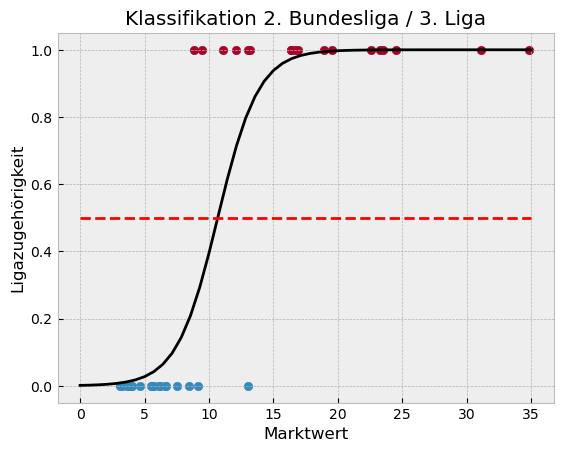

In [8]:
import matplotlib.pylab as plt; plt.style.use('bmh')

fig, ax = plt.subplots()
ax.scatter(data_dritte_liga['Wert'], data_dritte_liga['Ligazugehörigkeit'])
ax.scatter(data_zweite_liga['Wert'], data_zweite_liga['Ligazugehörigkeit'])
ax.plot(x, sigma_z, color='black')
ax.hlines(0.5, 0, 35, 'red', 'dashed')
ax.set_xlabel('Marktwert')
ax.set_ylabel('Ligazugehörigkeit')
ax.set_title('Klassifikation 2. Bundesliga / 3. Liga');

Aus der Visualisierung der Wahrscheinlichkeitsfunktion können wir grob
abschätzen, bei welchem Marktwert ein Verein als Zweit- oder Drittligist
klassifiziert wird. Die Wahrscheinlichkeitsfunktion schneidet die 50 %
Grenzlinie ungefähr bei einem Marktwert von 11 Mio. Euro. Etwas genauer können
wir diese Grenze durch das Kommando `fsolve` aus dem Scipy-Modul bestimmen
lassen:

In [9]:
from scipy.optimize import fsolve

x_grenze =  fsolve(lambda x: wahrscheinlichkeitsfunktion(x, gewichte) - 0.5, 11.0)
print('Grenze des Marktwertes: {:.2f} Mio. Euro'.format(x_grenze[0]))

Grenze des Marktwertes: 10.68 Mio. Euro


## Zusammenfassung

In diesem Abschnitt haben wir an einem Beispiel gesehen, wie das logistische
Regressionsmodell von Scikit-Learn trainiert und bewertet wird.